In [43]:
set.seed(1234)

#install.packages("tidyverse")
#install.packages("xtable")
#install.packages("sandwich")
#install.packages("ggplot2")
#install.packages("readxl")
#install.packages("openxlsx")
#install.packages("lmtest")
#install.packages("hdm")
#install.packages("igraph")

library(igraph)
library(tidyverse)
library(xtable)
library(sandwich)
library(ggplot2)
library(readxl)
library(openxlsx)
library(lmtest)
library(hdm)

# Multiconilearity
Multicollinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated, making it difficult to separate out their individual effects on the dependent variable. In other words, multicollinearity occurs when there are linear relationships among the independent variables.

Mathematically, multicollinearity can be described using the following equation for a simple linear regression model:

𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+𝜖


Where:

𝑌 is the dependent variable.𝑋1 and 𝑋2 are the independent variables.𝛽0, 𝛽1, and 𝛽2 are the coefficients.ϵ is the error term. When 𝑋1 and 𝑋2 are highly correlated, it becomes difficult to estimate the coefficients accurately. This can lead to unstable estimates and inflated standard errors, making interpretation of the model problematic.

This rerfers to the scenario when $(X'X)$ is not invertible, so estimators like OLS cannot be computed as is (software or packages will have to remove some variables to avoid this problem). The more covariates the higher the changes of getting multicollinearity, specially if these covariates are dummies. Some classical examples of cases where multicollinearity becomes an issue are when we create dummies for each instance of a categorical variable but we don't ommit a category in the regression, or when we simply have redundant information like $x_1$ = birthweight in kg, $x_2$ = birthbweight in grams.

In [44]:
set.seed(123)
x=matrix(,10,10)
for(i in c(1:9)){
    x[,i]=rnorm(10,0,1)
}
x[,10]=1*x[,1]+0.5*x[,2]+0.25*x[,3]
print(x)

             [,1]       [,2]       [,3]        [,4]        [,5]        [,6]
 [1,] -0.56047565  1.2240818 -1.0678237  0.42646422 -0.69470698  0.25331851
 [2,] -0.23017749  0.3598138 -0.2179749 -0.29507148 -0.20791728 -0.02854676
 [3,]  1.55870831  0.4007715 -1.0260044  0.89512566 -1.26539635 -0.04287046
 [4,]  0.07050839  0.1106827 -0.7288912  0.87813349  2.16895597  1.36860228
 [5,]  0.12928774 -0.5558411 -0.6250393  0.82158108  1.20796200 -0.22577099
 [6,]  1.71506499  1.7869131 -1.6866933  0.68864025 -1.12310858  1.51647060
 [7,]  0.46091621  0.4978505  0.8377870  0.55391765 -0.40288484 -1.54875280
 [8,] -1.26506123 -1.9666172  0.1533731 -0.06191171 -0.46665535  0.58461375
 [9,] -0.68685285  0.7013559 -1.1381369 -0.30596266  0.77996512  0.12385424
[10,] -0.44566197 -0.4727914  1.2538149 -0.38047100 -0.08336907  0.21594157
             [,7]       [,8]         [,9]       [,10]
 [1,]  0.37963948 -0.4910312  0.005764186 -0.21539067
 [2,] -0.50232345 -2.3091689  0.385280401 -0.10476430
 [

In [45]:
x_inv=solve(x)

ERROR: Error in solve.default(x): system is computationally singular: reciprocal condition number = 9.2431e-18


# RCT

In [46]:
Penn <- as.data.frame(read.csv("/penn_jae.csv",sep=","))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

The following object is masked _by_ .GlobalEnv:

    X


The following objects are masked from Penn (pos = 3):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg, X




In [47]:
head(Penn)

,X,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,10824,0,18,18,0,0,0,0,2,⋯,1,0,0,0,0,0,0,0,1,0
2,2,10635,2,7,3,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
4,4,10824,0,1,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,5,10747,0,27,27,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
10,10,10754,2,20,20,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
13,13,10831,0,27,27,0,0,0,0,1,⋯,1,0,0,0,1,1,0,1,0,0


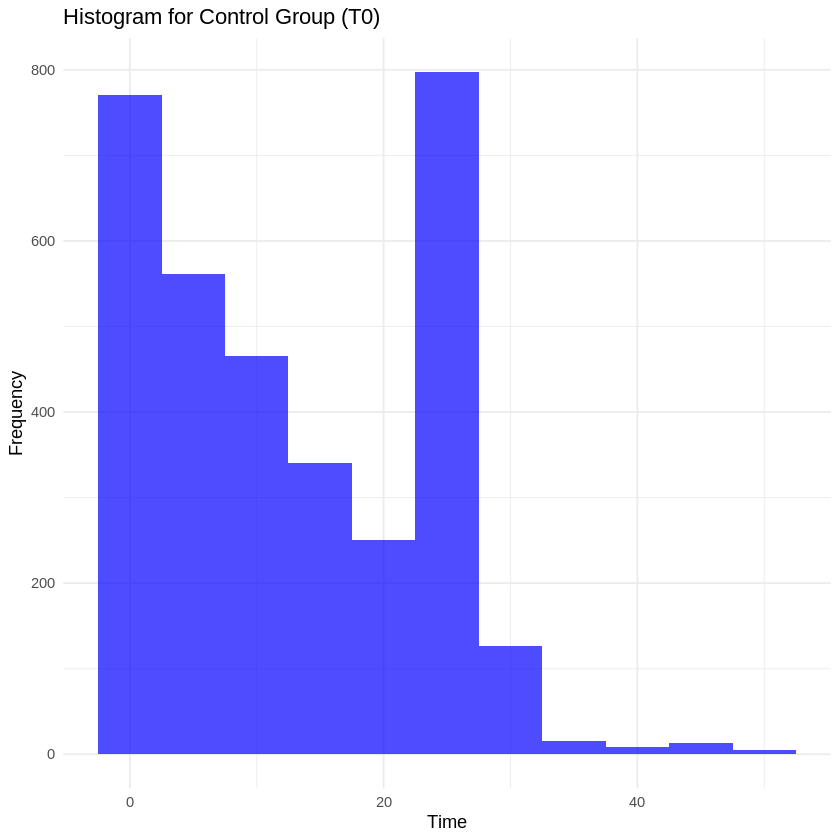

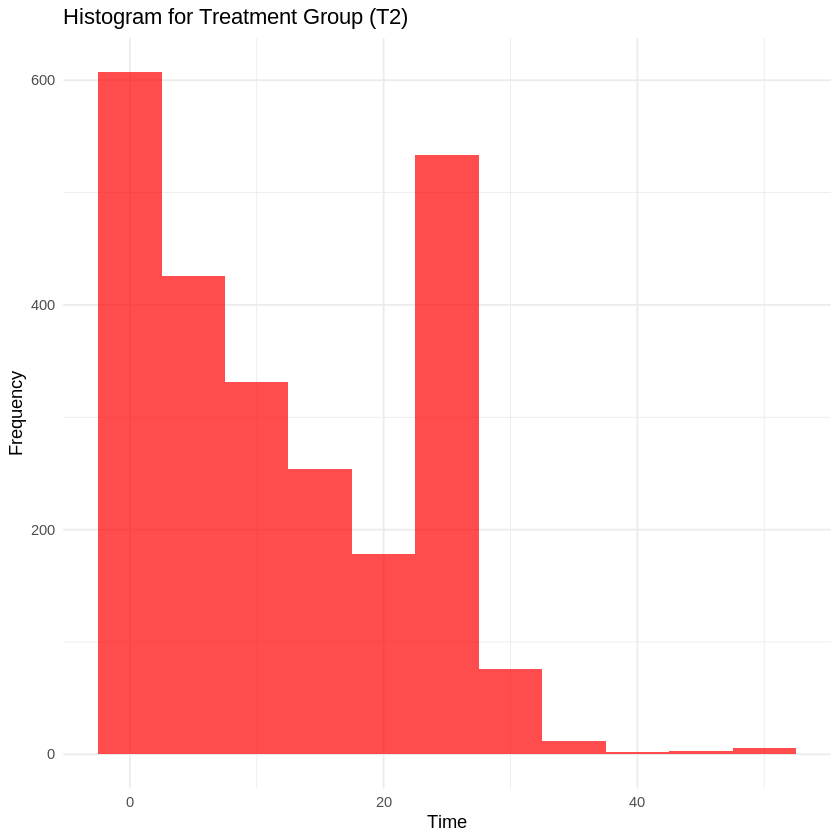

In [48]:
Penn_t0 <- subset(Penn, tg == 0)
Penn_t2 <- subset(Penn, tg == 2)

histograma_t0 <- ggplot(Penn_t0, aes(x = inuidur1)) +
  geom_histogram(binwidth = 5, fill = "blue", alpha = 0.7) +
  labs(
    title = "Histogram for Control Group (T0)",
    x = "Time",
    y = "Frequency"
  ) +
  theme_minimal()

histograma_t2 <- ggplot(Penn_t2, aes(x = inuidur1)) +
  geom_histogram(binwidth = 5, fill = "red", alpha = 0.7) +
  labs(
    title = "Histogram for Treatment Group (T2)",
    x = "Time",
    y = "Frequency"
  ) +
  theme_minimal()

print(histograma_t0)
print(histograma_t2)

##2.1 CL

In [49]:
formula_cl <- log(inuidur1)~T2
ols.cl_reg <- lm(formula_cl)

ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))

print(ols.cl)



t test of coefficients:

             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.023729   0.016021 126.3162  < 2e-16 ***
T2          -0.078825   0.032509  -2.4247  0.01535 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



## 2.2 CRA

In [50]:
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
ols.cra_reg <- lm(formula_cra)
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))
print(ols.cra)
X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

names(X1)[2] <- "T2"


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4172819  0.3578201  6.7556 1.565e-11 ***
T2                   -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

## 2.3 IRA

In [51]:
X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X)
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)

S <- as.data.frame(model.matrix(ols.ira_reg))

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

names(S1)[2] <- "T2"


t test of coefficients:

                           Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)               2.0263431  0.0158116 128.1556 < 2.2e-16 ***
T2                       -0.0699044  0.0320764  -2.1793 0.0293503 *  
Xfemale                  -0.9433273  0.2828151  -3.3355 0.0008570 ***
Xblack                   -0.6734467  0.2450385  -2.7483 0.0060092 ** 
Xothrace                 -2.8890389  0.5954889  -4.8515 1.258e-06 ***
Xfactor(dep)1             0.3565813  0.4194870   0.8500 0.3953385    
Xfactor(dep)2             0.1902699  0.3735550   0.5093 0.6105277    
Xq2                       0.1220052  0.3591173   0.3397 0.7340679    
Xq3                      -0.2448805  0.3585870  -0.6829 0.4946958    
Xq4                      -0.2325918  0.3589780  -0.6479 0.5170583    
Xq5                      -0.0706375  0.3580735  -0.1973 0.8436227    
Xq6                      -0.3489823  0.3608200  -0.9672 0.3334899    
Xagelt35                 -0.2059965  0.3138224  -0.6564 0.511586

## 2.4 IRA ussing LASSO

In [52]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

print(rlasso.ira)

S = as.data.frame(DX)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Results

In [53]:
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")

print(table)

                        CL         CRA         IRA IRA w Lasso
estimate       -0.07882533 -0.07120664 -0.06990440 -0.07457328
standard error  0.03250889  0.03204403  0.03207638  0.03208892


## Some coefficients

                         variable coeficiente std_error      lower     upper
T2:Xfemale             T2:Xfemale  -0.6597505 0.5498974 -1.7375493 0.4180484
T2:Xblack               T2:Xblack   0.4525570 0.5103188 -0.5476679 1.4527819
T2:Xagelt35           T2:Xagelt35   1.1233199 0.6374193 -0.1260218 2.3726617
T2:Xfactor(dep)1 T2:Xfactor(dep)1   0.7636025 0.7854484 -0.7758764 2.3030813


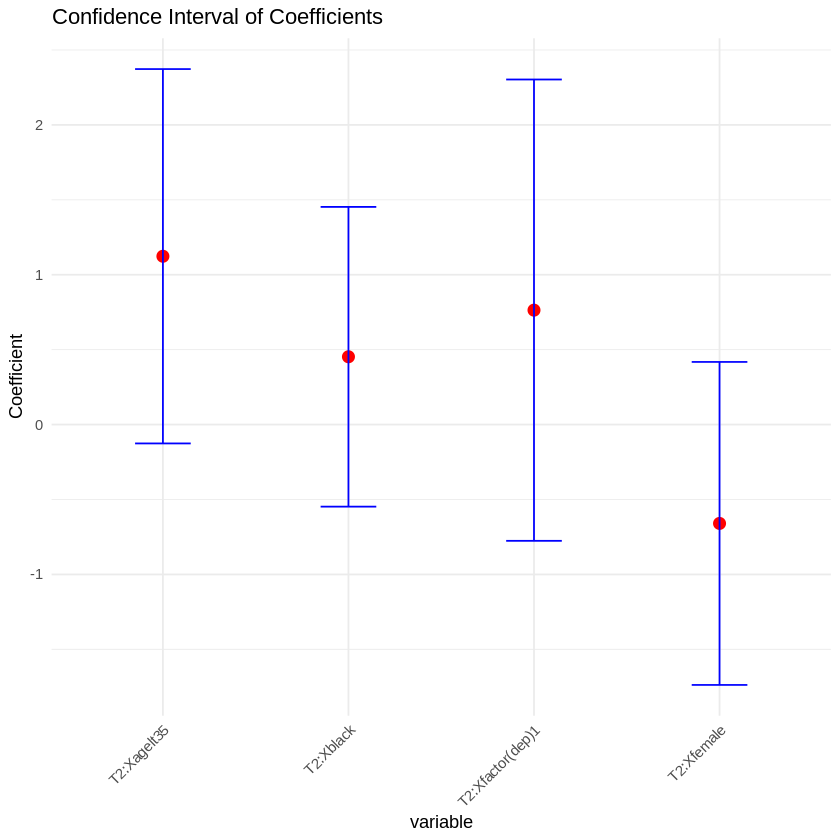

In [62]:
df_coef_ira <- data.frame(
  variable = rownames(ols.ira),
  coeficiente = ols.ira[, 1],
  std_error = ols.ira[, 2]
)

df_coef_ira=df_coef_ira[c(105,106,115,108),]

df_coef_ira$lower=df_coef_ira$coeficiente - 1.96 * df_coef_ira$std_error
df_coef_ira$upper=df_coef_ira$coeficiente + 1.96 * df_coef_ira$std_error
print(df_coef_ira)

confidence_plot <- ggplot(df_coef_ira, aes(x = variable, y = coeficiente)) +
  geom_point(color = "red", size = 3) +
  geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.3, color = "blue") +
  labs(x = "variable", y = "Coefficient", title = "Confidence Interval of Coefficients") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(confidence_plot)


Females from treatment group 2 experiences an average 65.9% decrease of about in the length of unemployment spell. In the case of black people, it increase on 45.3%. Like this second group, people under 35 years old, lives an average of 112% increase, and the last group, 76.3% of increase.

# A Crash Course in Good and Bad Controls

## Model 1

       Z                  X                  Y           
 Min.   :-2.80978   Min.   :-4.95467   Min.   :-7.44153  
 1st Qu.:-0.64395   1st Qu.:-1.01062   1st Qu.:-1.55562  
 Median : 0.02072   Median : 0.07154   Median :-0.00533  
 Mean   : 0.02094   Mean   : 0.04338   Mean   : 0.04805  
 3rd Qu.: 0.66460   3rd Qu.: 1.01240   3rd Qu.: 1.62452  
 Max.   : 3.24104   Max.   : 5.02345   Max.   : 8.16910  
$Wrong

Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2508 -0.7657  0.0291  0.7793  3.5400 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01292    0.03550  -0.364    0.716    
X            1.40549    0.02398  58.610   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.122 on 998 degrees of freedom
Multiple R-squared:  0.7749,	Adjusted R-squared:  0.7746 
F-statistic:  3435 on 1 and 998 DF,  p-value: < 2.2e-16


$Classical

Call:
lm(formula = Y ~ X +

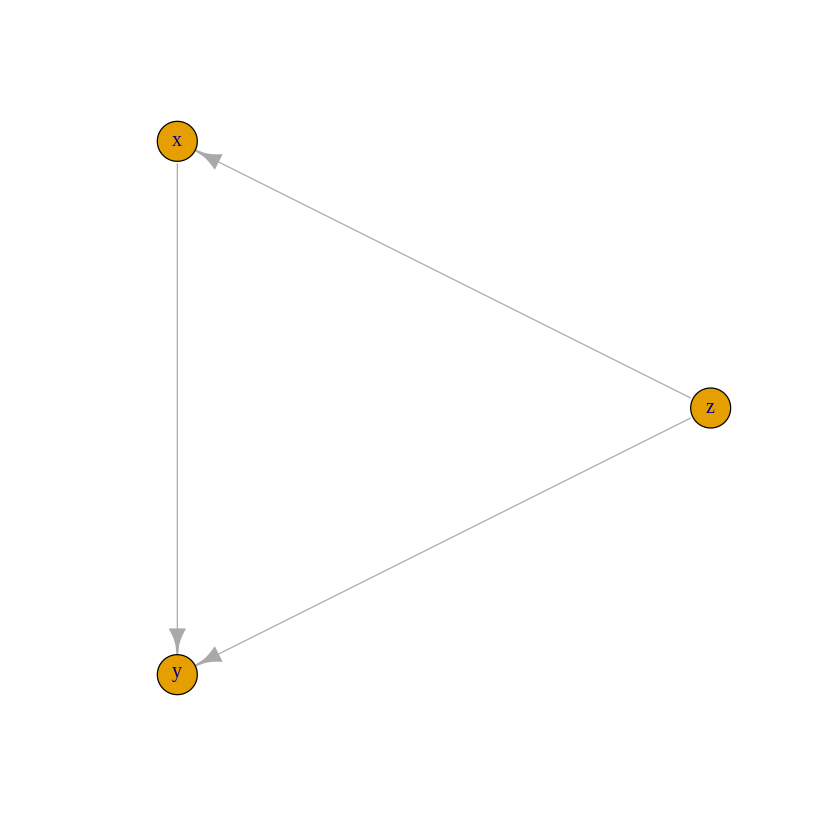

In [55]:
n=1000
Z <- rnorm(n)
X <- 1 * Z + rnorm(n)
Y <- X + 0.8 * Z + rnorm(n)

data <- data.frame(Z = Z, X = X, Y = Y)
summary_data <- summary(data)
print(summary_data)

ols_bad <- lm(Y ~ X, data = data)
ols_good <- lm(Y ~ X + Z, data = data)

table1 <- list("Wrong" = summary(ols_bad), "Classical" = summary(ols_good))

note <- "Ex. Smoking (X), Lung Cancer (Y), and Age (Z)
Older people are more likely to smoke, and due to age also more likely to develop any type of cancer
Not controlling for age will bias the estimation"

table1b <- c(table1, note)
print(table1b)

g2 <- graph(edges = c(1, 2, 1, 3, 2, 3), n = 3, directed = TRUE)
V(g2)$name <- c("z", "x", "y")
plot(g2, layout = layout.circle)

## Model 2

$Wrong

Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6389 -1.3479  0.0332  1.3558  5.9980 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07677    0.06447  -1.191    0.234    
X            1.72008    0.05626  30.573   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 998 degrees of freedom
Multiple R-squared:  0.4836,	Adjusted R-squared:  0.4831 
F-statistic: 934.7 on 1 and 998 DF,  p-value: < 2.2e-16


$Classical

Call:
lm(formula = Y ~ X + Z, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3447 -0.9964  0.0217  1.0332  4.6696 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02107    0.04719  -0.446    0.655    
X            1.02122    0.04750  21.501   <2e-16 ***
Z            0.89677    0.03043  29.469   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



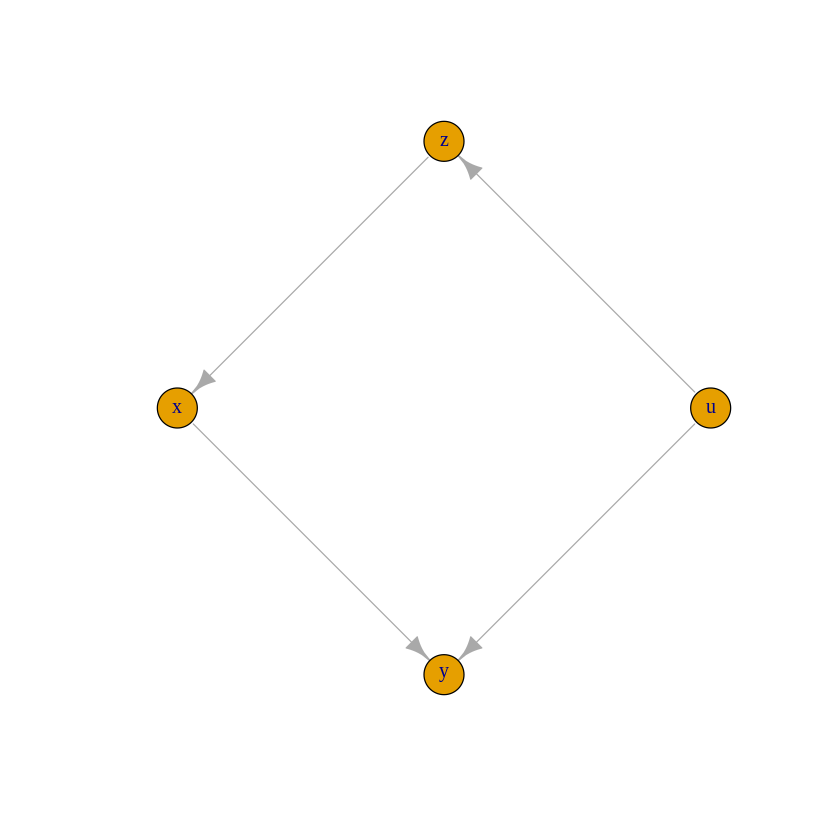

In [56]:
n <- 1000
U <- rnorm(n)
Z <- 1.5 * U + rnorm(n)
X <- 0.3 * Z + rnorm(n)
Y <- X + 2 * U + rnorm(n)
data <- data.frame(U = U, Z = Z, X = X, Y = Y)

ols_bad <- lm(Y ~ X, data = data)
ols_good <- lm(Y ~ X + Z, data = data)

table2 <- list("Wrong" = summary(ols_bad), "Classical" = summary(ols_good))

note <- "(U:Motivation, Z:Study time, X:Highschool grades, Y: UNI enrollment)
Motivation makes students study more time, so grades increase and so does the probability of enrollment.
Motivation also can have a direct effecet on enrollment
Although motivation is an unobservable confounder, controlling for Z blocks the backdoor path, diminishing bias"

table2b <- c(table2, note)
print(table2b)

g2 <- graph(edges = c(1, 2, 1, 4, 2, 3, 3, 4), n = 4, directed = TRUE)
V(g2)$name <- c("u", "z", "x", "y")
plot(g2, layout = layout.circle)

## Model 3

$Wrong

Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5391 -0.8581  0.0199  0.9133  4.2636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02782    0.04033    0.69     0.49    
X            1.19606    0.04029   29.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.274 on 998 degrees of freedom
Multiple R-squared:  0.4689,	Adjusted R-squared:  0.4684 
F-statistic: 881.3 on 1 and 998 DF,  p-value: < 2.2e-16


$Classical

Call:
lm(formula = Y ~ X + Z, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7449 -0.7802  0.0094  0.7678  3.1970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01392    0.03606   0.386      0.7    
X            1.10802    0.03644  30.408   <2e-16 ***
Z            0.38958    0.02454  15.876   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



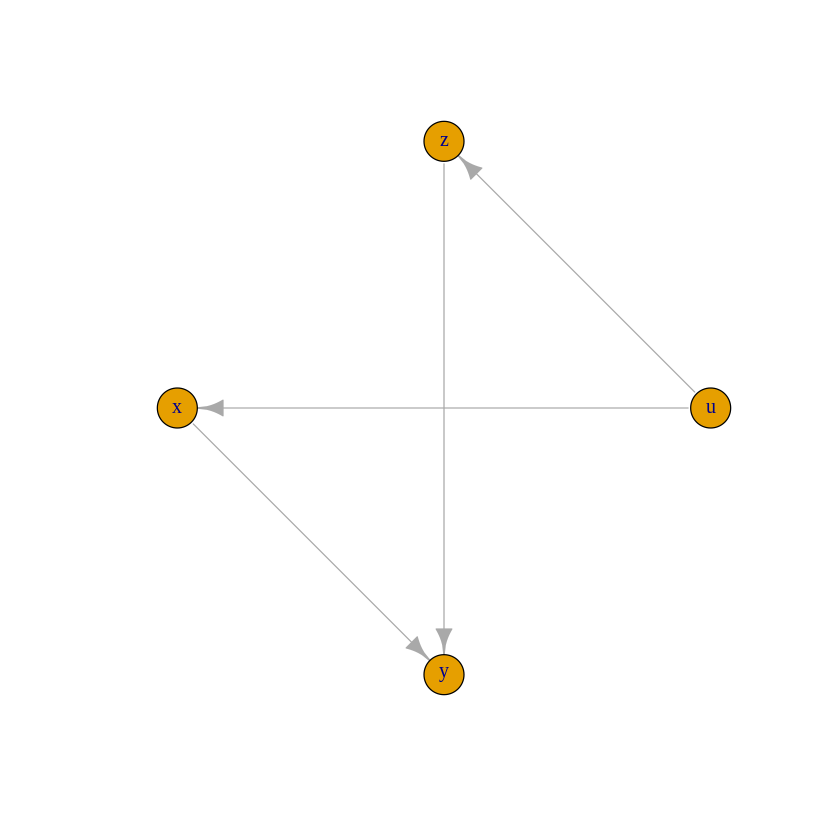

In [57]:
n <- 1000
U <- rnorm(n)
Z <- 1.1 * U + rnorm(n)
X <- 0.2 * U + rnorm(n)
Y <- X + 0.8 * U + rnorm(n)
data <- data.frame(Z = Z, X = X, Y = Y)

ols_bad <- lm(Y ~ X, data = data)
ols_good <- lm(Y ~ X + Z, data = data)

table3 <- list("Wrong" = summary(ols_bad), "Classical" = summary(ols_good))

note <- "(U: pro-social preferences, X: expenditure in charities, Z: time spend volunteering, Y: feeling of belonging (from a test result))
People with more pro-social preferences may expend more in charities and volunteering more.
Similar to the previous example, controlling for X and Z blocks the backdoor path, although social preferences are unobservable"

table3b <- c(table3, note)
print(table3b)

g2 <- graph(edges = c(1, 2, 1, 3, 2, 4, 3, 4), n = 4, directed = TRUE)
V(g2)$name <- c("u", "z", "x", "y")
plot(g2, layout = layout.circle)

## Model 8

$`No control`

Call:
lm(formula = Y ~ X, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-9.008 -2.232  0.045  2.282  8.856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08242    0.09868   0.835    0.404    
X            2.03742    0.09665  21.080   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.118 on 998 degrees of freedom
Multiple R-squared:  0.3081,	Adjusted R-squared:  0.3074 
F-statistic: 444.4 on 1 and 998 DF,  p-value: < 2.2e-16


$`Neutral control`

Call:
lm(formula = Y ~ X + Z, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2415 -0.6632  0.0106  0.6671  2.7905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02352    0.03139   0.749    0.454    
X            1.98036    0.03075  64.408   <2e-16 ***
Z            2.98644    0.03171  94.172   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

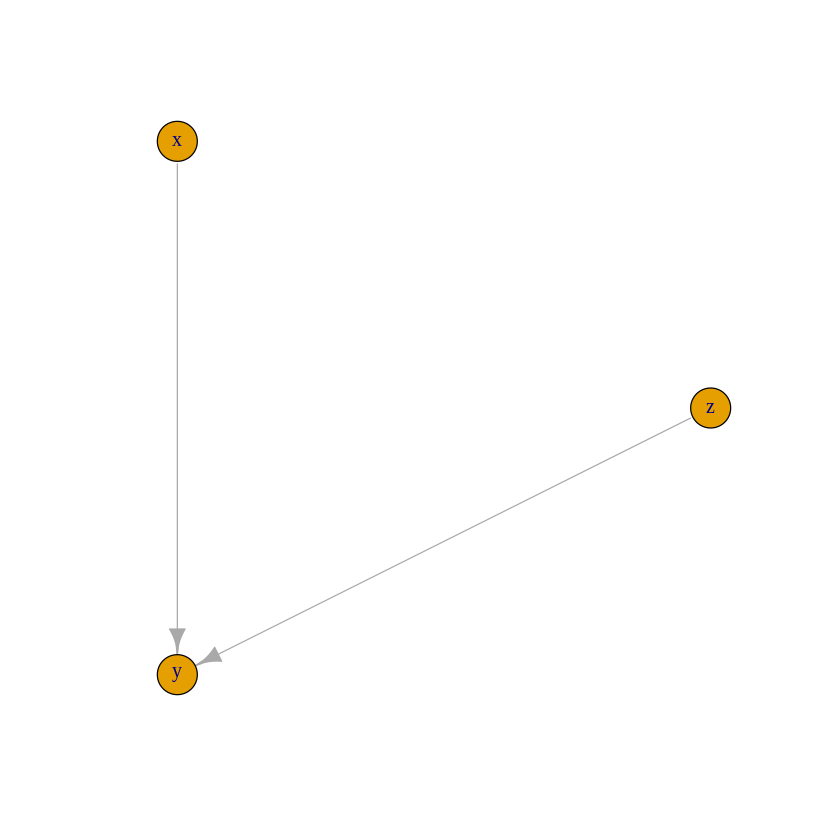

In [58]:
n <- 1000
Z <- rnorm(n)
X <- rnorm(n)
Y <- 2 * X + 3 * Z + rnorm(n)
data <- data.frame(Z = Z, X = X, Y = Y)

ols_nocontrol <- lm(Y ~ X, data = data)
ols_neutralcontrol <- lm(Y ~ X + Z, data = data)

table8 <- list("No control" = summary(ols_nocontrol), "Neutral control" = summary(ols_neutralcontrol))

note <- "X: dummy whether the person gets a assigned a food subsidy, Z: sex, Y:food consumption
Although no variable is a confounder, adding Z can we good for precision"

table8b <- c(table8, note)
print(table8b)

g2 <- graph(edges = c(1, 3, 2, 3), n = 3, directed = TRUE)
V(g2)$name <- c("z", "x", "y")
plot(g2, layout = layout.circle)

## Model 12

$`No control`

Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3812 -1.2127  0.0088  1.1944  6.0196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.004211   0.056961   0.074    0.941    
X           5.285491   0.056951  92.807   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.801 on 998 degrees of freedom
Multiple R-squared:  0.8962,	Adjusted R-squared:  0.8961 
F-statistic:  8613 on 1 and 998 DF,  p-value: < 2.2e-16


$`Control (overcontrol bias)`

Call:
lm(formula = Y ~ X + Z, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.269 -1.105  0.036  1.066  5.810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03972    0.05157    0.77    0.441    
X            3.97007    0.10200   38.92   <2e-16 ***
Z            0.65532    0.04386   14.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

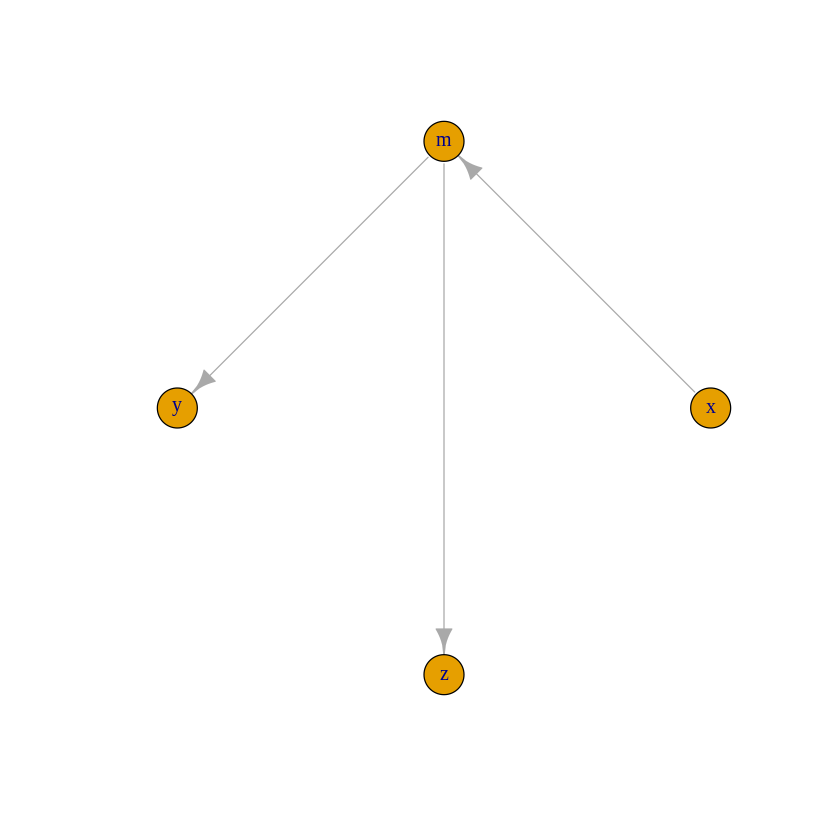

In [59]:
n <- 1000
X <- rnorm(n)
M <- 3.5 * X + rnorm(n)
Z <- 0.6 * M + rnorm(n)
Y <- 1.5 * M + rnorm(n)
data <- data.frame(Z = Z, X = X, M = M, Y = Y)

ols_nocontrol <- lm(Y ~ X, data = data)
ols_control <- lm(Y ~ X + Z, data = data)

table12 <- list("No control" = summary(ols_nocontrol), "Control (overcontrol bias)" = summary(ols_control))

note <- "x: randomly assigned participation of a labor force training program, M: network tips given during training,
Z: number of work contacts after training program, Y: dummy whether the participant has been employed after 1 year
Z is not necesarilly a mediatior, but controlling for it also blocks the causal path we are looking for"

table12b <- c(table12, note)
print(table12b)

g2 <- graph(edges = c(1, 2, 2, 3, 2, 4), n = 4, directed = TRUE)
V(g2)$name <- c("x", "m", "y", "z")
plot(g2, layout = layout.circle)